In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
# Set the AO file. Can replace "ao" in name with "nao" or "pna" as well.
ao_file = 'https://ftp.cpc.ncep.noaa.gov/cwlinks/norm.daily.ao.ensf.z1000.b01apr2002_current'
ao_file

'https://ftp.cpc.ncep.noaa.gov/cwlinks/norm.daily.ao.ensf.z1000.b01apr2002_current'

In [3]:
# Read in the file using Numpy... these are unfortunately Grads binary files.
# This lets you read in remote files without downloading first.
ds = np.DataSource(None)
ao_remote = ds.open(ao_file)

ao = np.fromfile(ao_remote, '<f4')

num_ens, fcst_days, nt = 11, 16, int(len(ao)/11/16)

# File begins April 1, 2002, this date list corresponds to the 3rd dimension in the reshaped AO matrix below.
date_list = [dt.date(2002, 4, 1) + dt.timedelta(days=x) for x in range(nt)]

# Reshape to something usable
ao_matrix_reshaped = np.reshape(ao, (num_ens, fcst_days, nt), order='F')


In [14]:
type(ao_matrix_reshaped)
#ao_matrix_reshaped

numpy.ndarray

In [17]:
data = xr.DataArray(ao_matrix_reshaped)
data = data.rename({'dim_0': 'ens_members', 'dim_1': 'lead_times', 'dim_2': 'date'})
#thus first column is the index: data[0,:]
data

<xarray.DataArray (ens_members: 11, lead_times: 16, date: 6588)>
array([[[ 5.383290e+14,  4.034387e-20, ...,  0.000000e+00,  0.000000e+00],
        [-1.979647e+02,  8.080593e+03, ...,  0.000000e+00,  0.000000e+00],
        ...,
        [-1.979647e+02, -1.979647e+02, ...,  3.355594e+00,  0.000000e+00],
        [-1.979647e+02, -1.979647e+02, ...,  2.190769e+00,  3.735343e+00]],

       [[ 1.837192e+29, -1.661682e+20, ...,  0.000000e+00,  0.000000e+00],
        [-1.979647e+02, -6.787953e+13, ...,  0.000000e+00,  0.000000e+00],
        ...,
        [-1.979647e+02, -1.979647e+02, ...,  7.686010e-01,  0.000000e+00],
        [-1.979647e+02, -1.979647e+02, ...,  1.739066e+00,  6.415339e-01]],

       ...,

       [[ 8.806804e-16, -9.034264e+27, ...,  0.000000e+00,  0.000000e+00],
        [-1.979647e+02,  6.669536e+06, ...,  0.000000e+00,  0.000000e+00],
        ...,
        [-1.979647e+02, -1.979647e+02, ...,  3.302783e-01,  0.000000e+00],
        [-1.979647e+02, -1.979647e+02, ..., -2.836548e

In [6]:
x = data[dict(lead_times=15, ens_members = 8)]
x

<xarray.DataArray (date: 6588)>
array([-197.9647  , -197.9647  , -197.9647  , ...,    2.326809,    0.215807,
          1.556391], dtype=float32)
Dimensions without coordinates: date

In [7]:
%matplotlib notebook

<IPython.core.display.Javascript object>


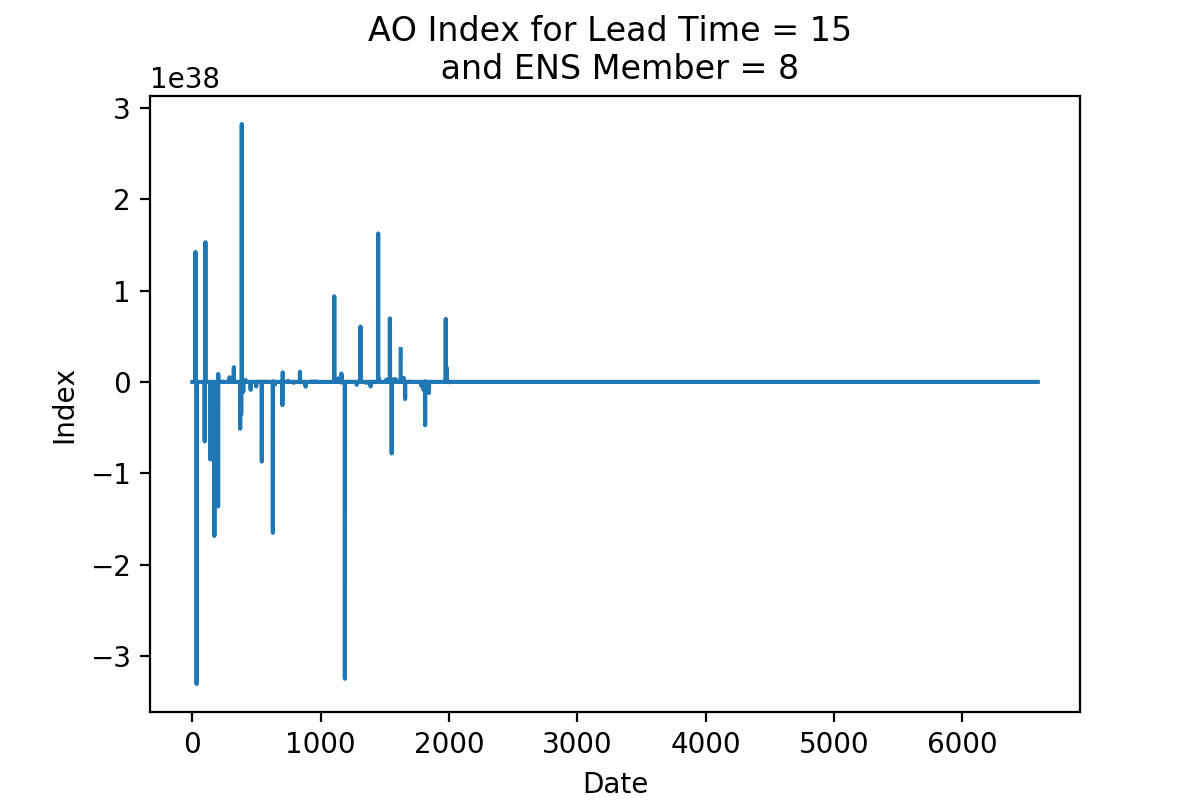

Text(0.5, 1.0, 'AO Index for Lead Time = 15 \n and ENS Member = 8')

In [10]:
plt.figure(figsize=(6,4))
plt.plot(x['date'], x)
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('AO Index for Lead Time = 15 \n and ENS Member = 8')